# The zip function:

generates tuples of its agrguments sequentially. Each element is each of the elements of the list together. That would be that the first one is mapped to the firts one of the second list, and the first one of the third list...

In [1]:
names = ['a','b','c']
ages  = [21,30,45]
favourite_colours = ['Pink','Gray','Blue']
print(list(zip(names,ages,favourite_colours)))
for name,age,colour in zip(names,ages,favourite_colours):
    print(name,age,colour)
asdf = list(zip(names,ages,favourite_colours))
print(asdf[1:])

[('a', 21, 'Pink'), ('b', 30, 'Gray'), ('c', 45, 'Blue')]
a 21 Pink
b 30 Gray
c 45 Blue
[('b', 30, 'Gray'), ('c', 45, 'Blue')]


In [2]:
from datetime import datetime
num_of_days = 10
years = [2009] *num_of_days
months= [12]   *num_of_days
days  = list(range(1,11))

times = [datetime(year,month,day)
         for year,month,day
         in zip(years,months,days)]
for time in times:
    print(time.isoformat())
print(len(times))

2009-12-01T00:00:00
2009-12-02T00:00:00
2009-12-03T00:00:00
2009-12-04T00:00:00
2009-12-05T00:00:00
2009-12-06T00:00:00
2009-12-07T00:00:00
2009-12-08T00:00:00
2009-12-09T00:00:00
2009-12-10T00:00:00
10


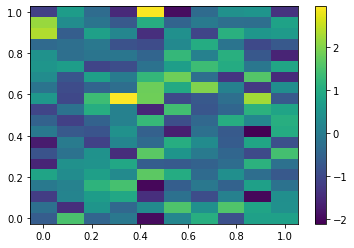

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_of_x   = 10
num_of_y   = 20
x          = np.linspace(0,1,num_of_x)
y          = np.linspace(0,1,num_of_y)
z          = np.random.randn(num_of_y,num_of_x)
plt.pcolormesh(x,y,z)
cbar = plt.colorbar()



# Now we are going to work with NetCDF files

In [9]:
#conda install netcdf4
import netCDF4 as nc
import os

In [25]:
Path_to_Files = 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Data_Day2/'
All_Files     = os.listdir(Path_to_Files)
print(All_Files[19])
Dataset       =nc.Dataset(Path_to_Files+All_Files[19])

wfs.t06z.ipe05.20230724_060000.nc


In [26]:
print(Dataset.variables)

{'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(x01)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(x02)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (91,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'alt': <class 'netCDF4._netCDF4.Variable'>
float32 alt(x03)
    long_name: altitude
    units: km
unlimited dimensions: 
current shape = (109,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'tec': <class 'netCDF4._netCDF4.Variable'>
float32 tec(x02, x01)
    long_name: tec
    units: TECu
unlimited dimensions: 
current shape = (91, 90)
filling on, default _FillValue of 9.969209968386869e+36 used, 'NmF2': <class 'netCDF4._netCDF4.Variable'>
float32 NmF2(x02, x01)
    long_name: NmF2
    units: m-3
unlimited dimensions: 
current shape = (91, 90)
f

<ipython-input-26-99ddddfe9296>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(Dataset.variables)


In [33]:
for variables in Dataset.variables:
    print(variables)
Tec_content = Dataset['tec'][:]

print(np.shape(Tec_content))
print(Dataset['tec'].units)

lon
lat
alt
tec
NmF2
HmF2
(91, 90)
TECu


<ipython-input-33-5ef6d8924eb3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Tec_content = Dataset['tec'][:]
<ipython-input-33-5ef6d8924eb3>:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(Dataset['tec'].units)


In [34]:
def plot_tec(dataset , figsize=(12,6)):
    fig,ax = plt.figure(figsize= figsize)
    ax.pcolormesh()
    return fig,ax

# This is for OMNI DATA reading

In [81]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter
import datetime
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from ai import cdas,cs
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [92]:
# file = open("C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/day_02/omni2_DST.lst")
# line = file.readline()
#print(line)
# file.close()
nlines = 3
Year  = []
DOY   = []
Hour  = []
Minute= []
DST   = []
with open("C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/day_02/omni2_DST.lst") as File:
    
    #header        = File.readline()
    #print('this is header= '+str(header))
    #variables     = header.split()
    #print('this is variables= '+str(variables))
    
    for line in File:
        tmp  = line.split()
        Year.append(int(tmp[0]))
        DOY.append(int(tmp[1]))
        Hour.append(int(tmp[2]))
        #Minute.append(int(tmp[3]))
        DST.append(int(tmp[3]))
        

In [108]:
nlines = 3
Year  = []
DOY   = []
Hour  = []
Minute= []
DST   = []
Times = []
with open("C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/day_02/omni_test.lst") as File:
    for i in range(nlines):
        print(File.readline())
    header        = File.readline()
    print('this is header= '+str(header))
    variables     = header.split()
    print('this is variables= '+str(variables))
    
    for line in File:
        tmp  = line.split()
        Year.append(int(tmp[0]))
        DOY.append(int(tmp[1]))
        Hour.append(int(tmp[2]))
        Minute.append(int(tmp[3]))
        DST.append(int(tmp[4]))
        datetime1 = datetime.datetime(int(tmp[0]),
                                     1,
                                     1,
                                     int(tmp[2]),
                                     int(tmp[3]))+datetime.timedelta(days =int(tmp[1])-1)
        print(datetime1)
        Times.append(datetime1)
print(Times)

This is line1

This is Line2

This is Line3

this is header= Year  Day  Hour  Minute  SYM-H

this is variables= ['Year', 'Day', 'Hour', 'Minute', 'SYM-H']
2013-03-16 00:00:00
2013-03-16 00:01:00
2013-03-16 00:02:00
2013-03-16 00:03:00
2013-03-16 00:04:00
2013-03-16 00:05:00
2013-03-16 00:06:00
2013-03-16 00:07:00
2013-03-16 00:08:00
2013-03-16 00:09:00
[datetime.datetime(2013, 3, 16, 0, 0), datetime.datetime(2013, 3, 16, 0, 1), datetime.datetime(2013, 3, 16, 0, 2), datetime.datetime(2013, 3, 16, 0, 3), datetime.datetime(2013, 3, 16, 0, 4), datetime.datetime(2013, 3, 16, 0, 5), datetime.datetime(2013, 3, 16, 0, 6), datetime.datetime(2013, 3, 16, 0, 7), datetime.datetime(2013, 3, 16, 0, 8), datetime.datetime(2013, 3, 16, 0, 9)]


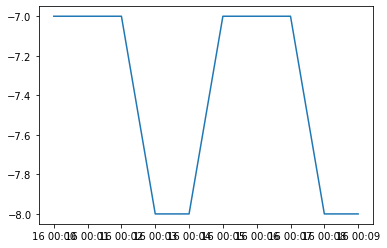

In [110]:
plt.plot(Times,DST)

In [ ]:
Bis_Datetime_Erne = []
for i in range(len(Bis_Erne_data_read[0])):
    Year=Bis_Erne_data_read[0][i]
    DOY=Bis_Erne_data_read[1][i]
    Hour=Bis_Erne_data_read[2][i]
    Min=Bis_Erne_data_read[3][i]
    Date=datetime.strptime(str(Year)+str('-')+str(DOY)+str('-')+str(Hour)+str('-')+str(Min),'%Y-%j-%H-%M')
    #print(Date)
    Bis_Datetime_Erne.append(Date)

In [129]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
print(Fido)


sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`fido_guide`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


In [131]:
Messenger_RTN = a.cdaweb.Dataset.messenger_mag_rtn
Messenger_RTN = Fido.search(a.Time('2012/3/4', '2012/3/4'), a.cdaweb.Dataset.messenger_mag_rtn)
print(Messenger_RTN)

Results from 1 Provider:

1 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

     Dataset             Start time               End time       
----------------- ----------------------- -----------------------
MESSENGER_MAG_RTN 2012-03-04 00:00:00.000 2012-03-04 23:59:59.000




In [135]:
res = Fido.search(a.Time('2014/02/16', '2014/02/20'),
                  a.cdaweb.Dataset('MESSENGER_MAG_RTN')) 
print(res)

Results from 1 Provider:

5 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

     Dataset             Start time               End time       
----------------- ----------------------- -----------------------
MESSENGER_MAG_RTN 2014-02-16 00:00:00.000 2014-02-16 23:59:59.000
MESSENGER_MAG_RTN 2014-02-17 00:00:00.000 2014-02-17 23:59:59.000
MESSENGER_MAG_RTN 2014-02-18 00:00:00.000 2014-02-18 23:59:59.000
MESSENGER_MAG_RTN 2014-02-19 00:00:00.000 2014-02-19 23:59:59.000
MESSENGER_MAG_RTN 2014-02-20 00:00:00.000 2014-02-20 23:59:59.000


